# What is the count of Question that has an acceptabled answer?

In [11]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets


In [2]:
accp_Answer= pd.read_csv('../Project/data/Acceptable answer with tag Count.csv')

accp_Answer['owner_total_votes']=accp_Answer.owner_up_votes-accp_Answer.owner_down_votes;
accp_Answer.drop(['title','accepted_answer_id','creation_date','owner_display_name','tags','post_type_id',
                 'owner_up_votes','owner_down_votes','id','owner_user_id'],axis=1,inplace=True)

accp_Answer.head(2)
#accp_Answer= accp_Answer[(accp_Answer.score<800) & (accp_Answer.answer_count<35)&  (accp_Answer.view_count<1100000)
#                         & (accp_Answer.comment_count<40) & (accp_Answer.owner_reputation<250000) & 
#                        (accp_Answer.owner_total_votes>-5000) & (accp_Answer.owner_total_votes<14000)]

,answer_count,comment_count,score,view_count,year,owner_reputation,ownerviews,tags_count,isAnswerAccepted,owner_total_votes
0,1,0,1,256,2019,652,65,3,1,933
1,1,0,0,256,2019,1,4,3,0,0


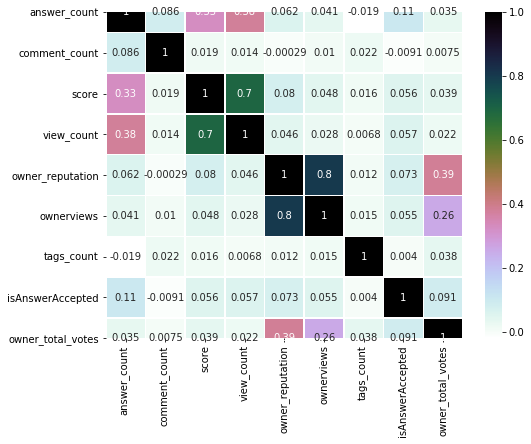

In [47]:
sns.scatterplot(x=accp_Answer.answer_count,y=accp_Answer.score,hue=accp_Answer.isAnswerAccepted)

sns.scatterplot(x=accp_Answer.view_count,y=accp_Answer.comment_count,hue=accp_Answer.isAnswerAccepted)

sns.scatterplot(x=accp_Answer.owner_reputation,y=accp_Answer.owner_total_votes,hue=accp_Answer.isAnswerAccepted)

sns.scatterplot(x=accp_Answer.view_count,y=accp_Answer.tags_count,hue=accp_Answer.isAnswerAccepted)

sns.scatterplot(x=accp_Answer.view_count,y=accp_Answer.score,hue=accp_Answer.isAnswerAccepted)

fig, ax = plt.subplots(figsize=(8,6))    
sns.heatmap(accp_Answer.corr(), annot=True,cmap='cubehelix_r', linewidths=.5, ax=ax)

In [49]:
trainX,testX,trainY,testY=train_test_split(accp_Answer.drop(['isAnswerAccepted'],axis=1),accp_Answer.isAnswerAccepted,
                                           test_size=0.2,random_state=0)
model=LogisticRegression();
model.fit(trainX,trainY);
prediction=model.predict(testX)
print('Accuracy of Model is :',metrics.accuracy_score(prediction,testY))

print( model.coef_)
print( model.intercept_)
print(prediction)

[[ 1.17958790e-01 -2.02082264e-02  4.82016909e-02  4.93787554e-06
   3.72107837e-06  7.03002279e-05  2.36070060e-02  2.28949362e-04]]
[0.02423081]
[1 1 1 ... 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


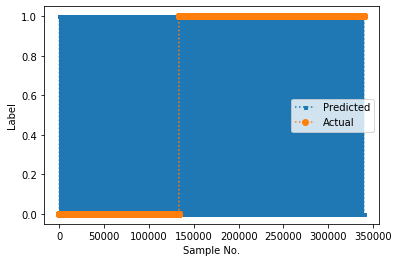

In [50]:
test_temp=np.argsort(testY)
plt.plot(np.arange(len(prediction)),prediction[test_temp],':s',markersize=3,label='Predicted')
plt.plot(np.arange(len(prediction)),testY.iloc[test_temp],':o',label='Actual')
plt.xlabel('Sample No.')
plt.ylabel('Label')
plt.legend()
plt.show()

In [183]:
def prediction_wrt_year(data,isVisualize=False):
    data=data.drop('year',axis=1)
    
    if isVisualize:
        fig, axs = plt.subplots(2,2,figsize=(14,6*2))
        
        sns.scatterplot(x=data.answer_count,y=data.score,hue=data.isAnswerAccepted,ax=axs[0,0])

        sns.scatterplot(x=data.view_count,y=data.comment_count,hue=data.isAnswerAccepted,ax=axs[0,1])

        sns.scatterplot(x=data.owner_reputation,y=data.owner_total_votes,hue=data.isAnswerAccepted,ax=axs[1,0])

        sns.scatterplot(x=data.view_count,y=data.tags_count,hue=data.isAnswerAccepted,ax=axs[1,1])
        plt.show();

    trainX,testX,trainY,testY=train_test_split(accp_Answer.drop(['isAnswerAccepted'],axis=1),accp_Answer.isAnswerAccepted,
                                           test_size=0.2,random_state=0)
    model=LogisticRegression();
    model.fit(trainX,trainY);
    prediction=model.predict(testX)
    
    accuracy= metrics.accuracy_score(prediction,testY)
    print('Accuracy of Model is :',accuracy)
    
    return accuracy;

def insertDataFrame(df,year,num):
    df.loc[-1] = [2011, num] # adding a row
    df.index = df.index + 1  # shifting index
    df = df.sort_index()  # sorting by index
    return ;

def findNumOccur(prob,threshold):
    num=1
    probSum = 0;
    while probSum<threshold:
        probSum= probSum+ math.pow(1-prob,num-1)*prob
        #print(num)
        #print('Probliblity is '+ str(probSum))
        num=num+1;
    return num -1;

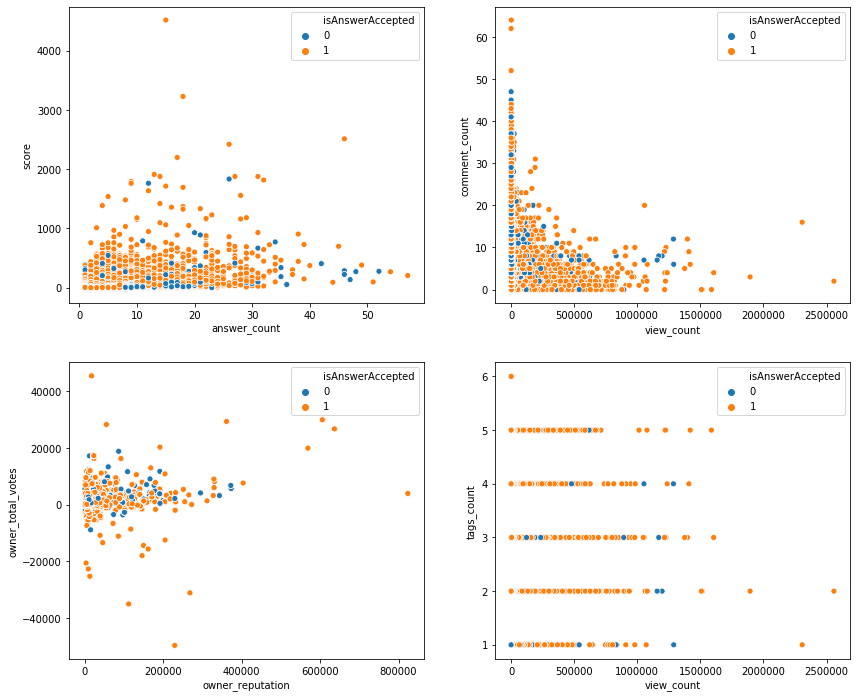

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Model is : 0.6073806824038759


0.6073806824038759

In [182]:
prediction_wrt_year(accp_Answer.copy(),isVisualize=True)

In [137]:
prediction_wrt_year(accp_Answer.query('year==2011').copy())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Model is : 0.6073806824038759


In [171]:
prediction_wrt_year(accp_Answer.query('year==2012').copy())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Model is : 0.6073806824038759


In [173]:
ans= prediction_wrt_year(accp_Answer.query('year==2012').copy())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Model is : 0.6073806824038759


In [194]:
findNumOccur(prediction_wrt_year(accp_Answer.query('year==2012').copy()),0.99)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Model is : 0.6073806824038759


5